## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 4
---------------------------------------

GOALS:

1. Answer all the questions from the lecture.
2. Practice making graphs with different types of data

----------------------------------------------------------

For this homework you will load the L data and practice making different kinds of plots!

This homework has **7 questions** from the lecture and **2 Problems** and a **Challenge**.

NOTE:
* Questions tend to be short answer or things were you change very minor parts of some given code.
* Problems tend to be more involved, like trying out our methods on a new column.
* Challenge problems are optional! They are intended to challenge you to reach beyond the basics of the class. I hope you will try the challenge problems!

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

### Load the Data

In [2]:
file_location = 'https://joannabieri.com/introdatascience/data/loans_full_schema.csv'
DF = pd.read_csv(file_location)
DF

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


### Check Observations and Variables

**Q1** How many **observations** are there?

**Q2** How many **variables** are there?

In [3]:
# Enter your code here to find the data shape
# Number of Rows - Observations
print(len(DF))
# Number of Columns - Variables
print(len(DF.columns))

10000
55


There are 10000 observations and 55 variables

### Reduce the number of variables

In [5]:
my_variables = ['loan_amount',
                'interest_rate',
                'term','grade',
                'state',
                'annual_income',
                'homeownership',
                'debt_to_income']

DF = DF[my_variables]

DF
DF.describe()

,loan_amount,interest_rate,term,annual_income,debt_to_income
count,10000.000000,10000.000000,10000.000000,1.000000e+04,9976.000000
mean,16361.922500,12.427524,43.272000,7.922215e+04,19.308192
std,10301.956759,5.001105,11.029877,6.473429e+04,15.004851
min,1000.000000,5.310000,36.000000,0.000000e+00,0.000000
25%,8000.000000,9.430000,36.000000,4.500000e+04,11.057500
50%,14500.000000,11.980000,36.000000,6.500000e+04,17.570000
75%,24000.000000,15.050000,60.000000,9.500000e+04,25.002500
max,40000.000000,30.940000,60.000000,2.300000e+06,469.090000


**Q3** Check out each of the variables (columns):

1. What does each column tell you? What are the units?
2. Is the data numerical? If so is it continuous or discrete?
3. If the categorical? If so is it ordinal or nominal?

<a href="https://www.openintro.org/data/index.php?data=loans_full_schema"> Here is a link to the full data description if you need to look up some of the column names.</a>

-----------------------------------------

The column tells us the loan amounts - numerical continuous, interest rate - numerical continuous, term - numerical discrete, grade - categorical ordinal, state - categorical nominal, annual income - numerical continuous, homeownership - categorical nominal, debt to income amount - numerical continuous.

### Here is Example Code for a simple Histogram

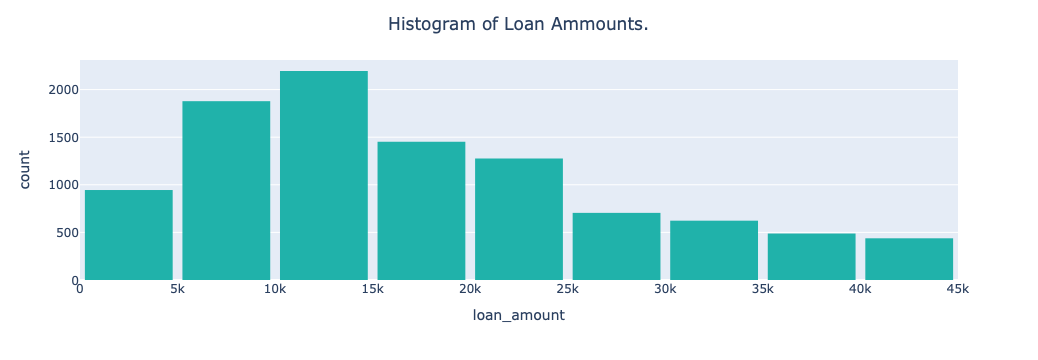

In [4]:
fig = px.histogram(DF,
                   nbins=10,
                   x='loan_amount',
                   color_discrete_sequence=['lightseagreen'])

fig.update_layout(bargap=0.1,
                  title='Histogram of Loan Ammounts.',
                  title_x=0.5)
fig.show()

**Q4** You try changing the number of bins **nbins** what do you notice? Are there good choices? Bad choices?


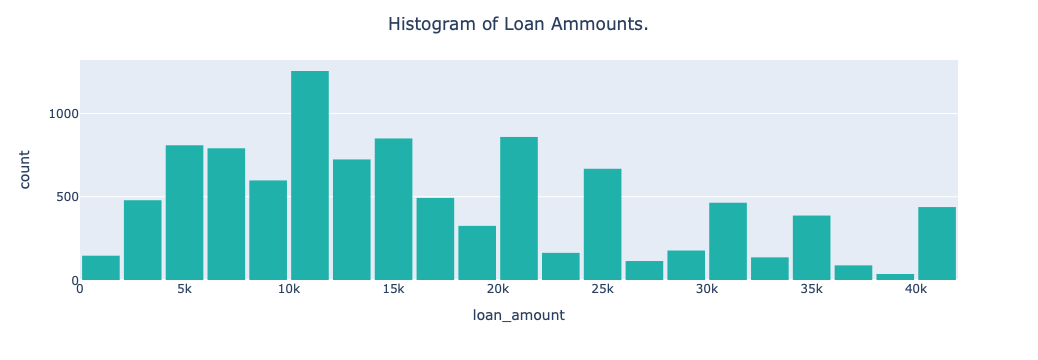

In [7]:
# Your code here (experiment here)
fig = px.histogram(DF,
                   nbins=20,
                   x='loan_amount',
                   color_discrete_sequence=['lightseagreen'])

fig.update_layout(bargap=0.1,
                  title='Histogram of Loan Ammounts.',
                  title_x=0.5)
fig.show()

I notice that the histogram starts changing the width of the x axis amounts.

**Problem 1** Create a histogram of your own! Try making a histogram of one of the other pieces of numerical data. Make it as fancy as you want. Include some categorical information. Do you learn anything from your graph? If so what?


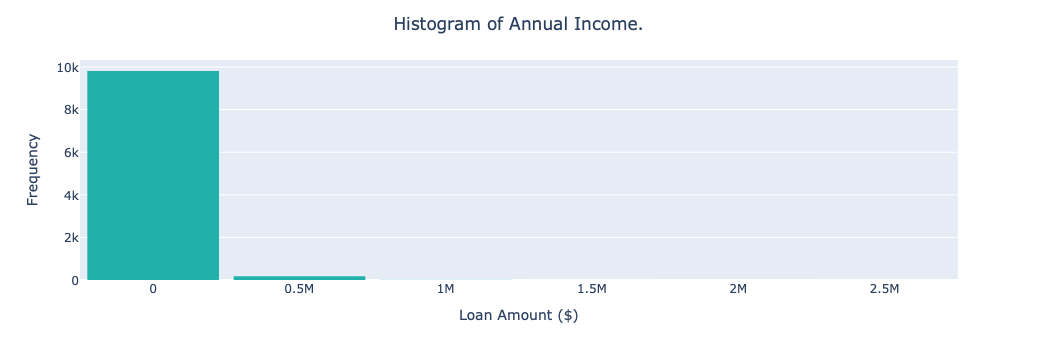

In [8]:
# Your code here
fig = px.histogram(DF,
                   nbins=9,
                   x='annual_income',
                   color_discrete_sequence=['lightseagreen'],
                   )

fig.update_layout(bargap=0.1,
                  title='Histogram of Annual Income.',
                  title_x=0.5,
                  xaxis_title="Loan Amount ($)",
                  yaxis_title="Frequency")
fig.show()

### Here is example code for a histogram with a box plot included.

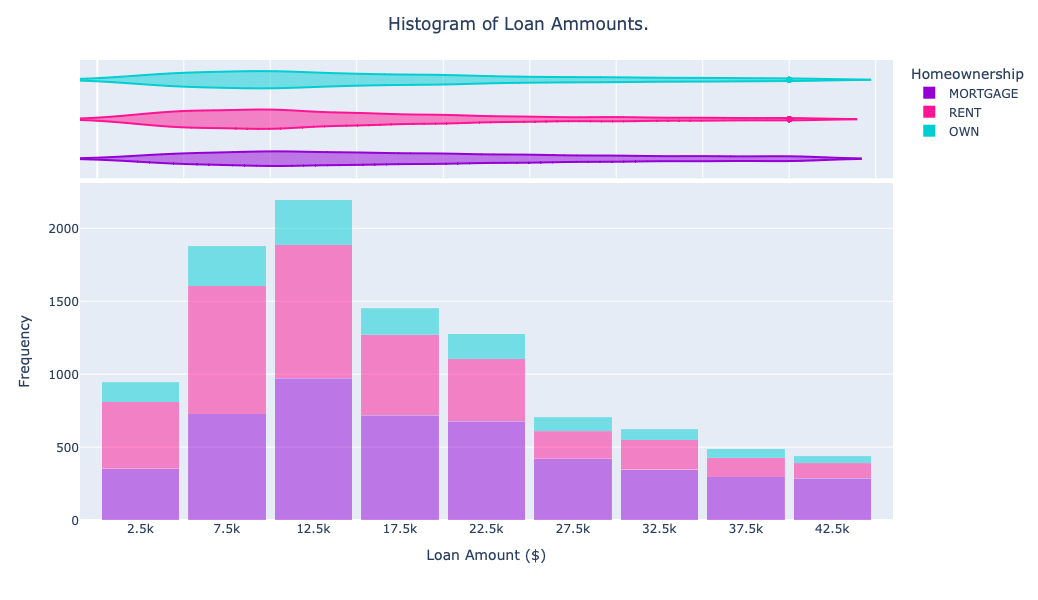

In [10]:
fig = px.histogram(DF,
                   nbins=9,
                   x='loan_amount',
                   color='homeownership',
                   opacity=0.5,
                   color_discrete_map={'MORTGAGE': 'darkviolet', 
                                       'RENT': 'deeppink', 
                                       'OWN': 'darkturquoise'},
                   marginal="violin"
                   )

fig.update_layout(bargap=0.1,
                  title='Histogram of Loan Ammounts.',
                  title_x=0.5,
                  xaxis={'range':[-1000, 46000]},
                  xaxis_title="Loan Amount ($)",
                  yaxis_title="Frequency",
                  legend_title="Homeownership",
                  autosize=False,
                  width=800,
                  height=600)
fig.show()

**Q5** Change the above plot to marginal="violin" and see what changes. Make some observations about the graph

The box plot changed drastically the lines became wider.

In [11]:
counts = DF['homeownership'].value_counts()
(counts)

homeownership
MORTGAGE    4789
RENT        3858
OWN         1353
Name: count, dtype: int64

**Q6** Copy and past the code above, but change it to get value counts for one of the other categorical columns

In [13]:
## Your code here
counts = DF['state'].value_counts()
(counts)

state
CA    1330
TX     806
NY     793
FL     732
IL     382
NJ     338
OH     338
GA     334
NC     299
PA     298
VA     261
AZ     255
MD     247
MI     245
MA     237
CO     235
WA     235
CT     181
IN     178
TN     167
MN     159
MO     159
NV     158
SC     145
OR     130
WI     128
AL     122
KY      97
LA      96
KS      89
OK      81
MS      72
AR      70
WV      68
UT      61
NE      56
RI      53
NH      47
NM      43
ID      38
HI      35
AK      33
ME      26
DE      24
MT      24
VT      23
SD      20
WY      19
DC      19
ND      14
Name: count, dtype: int64

### Here is example code for a bar plot

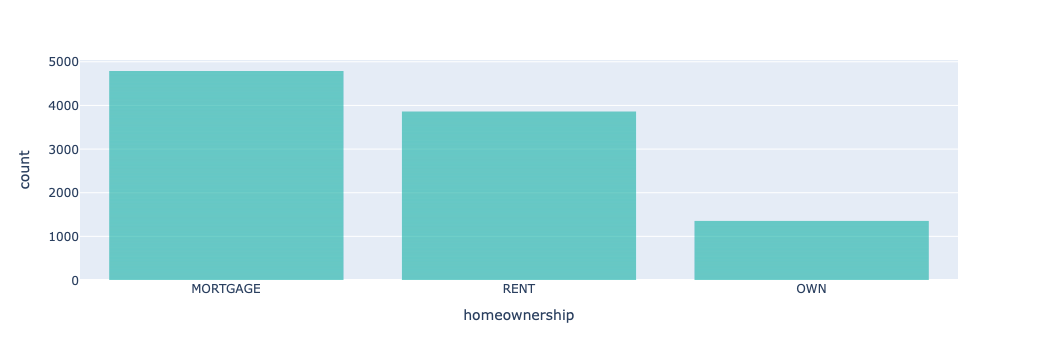

In [14]:
fig = px.bar(DF,
            x='homeownership',
            color_discrete_sequence=['lightseagreen'])
fig.update_traces(dict(marker_line_width=0))
fig.show()

**Q7** Can you figure out how to add x labels, y labels, and a title to this graph?

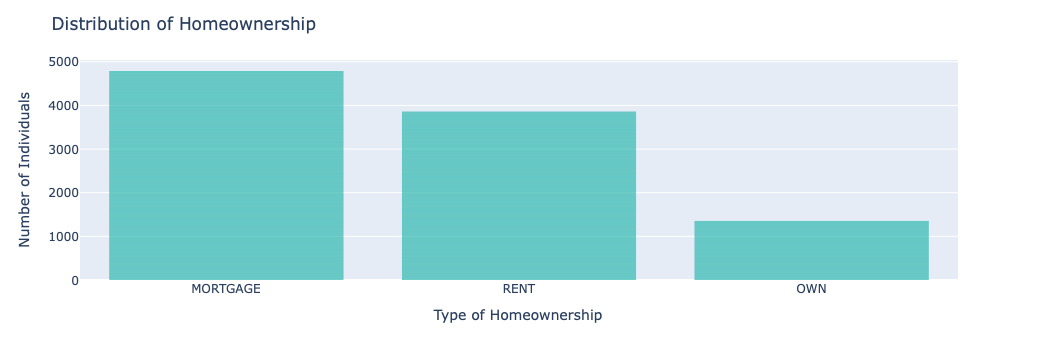

In [15]:
# Your code here

fig = px.bar(DF, x='homeownership', color_discrete_sequence=['lightseagreen'])
fig.update_traces(dict(marker_line_width=0))

# Add title and axis labels using update_layout
fig.update_layout(
    title_text='Distribution of Homeownership',  # Title of the graph
    xaxis_title_text='Type of Homeownership',  # X-axis label
    yaxis_title_text='Number of Individuals'  # Y-axis label
)

fig.show()


**Problem 2** Try to make your own bar plot of one of the other categorical columns. Add some categorical fill or facets. See how fancy you can make your graph. Make sure it is also still really informative.

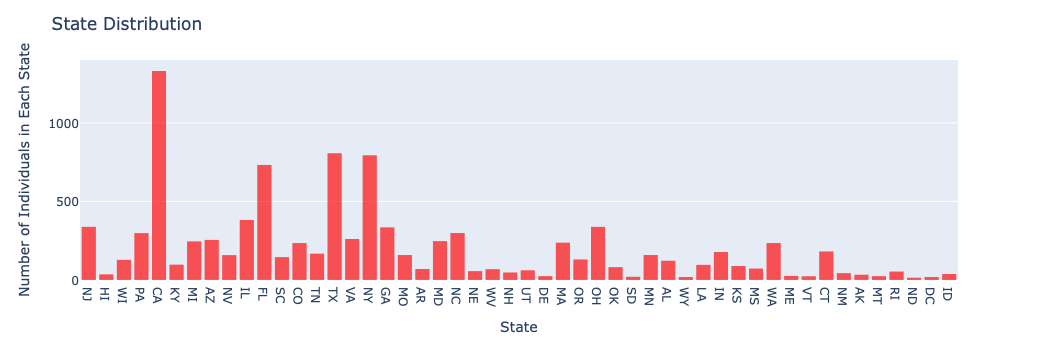

In [18]:
# Your code here
fig = px.bar(DF, x='state', color_discrete_sequence=['red'])
fig.update_traces(dict(marker_line_width=0))

# Add title and axis labels using update_layout
fig.update_layout(
    title_text='State Distribution',  # Title of the graph
    xaxis_title_text='State',  # X-axis label
    yaxis_title_text='Number of Individuals in Each State'  # Y-axis label
)

fig.show()

### Challenge:

Here is a data set that contains demographic data from the Behavioral Risk Factors Surveillance System from the CDC. It is a small subset of 60 observations.

Here is a link to the variable information:

<a href="https://www.openintro.org/data/index.php?data=cdc.samp" target="_blank">https://www.openintro.org/data/index.php?data=cdc.samp</a>

Your goal is to look at the columns and then make an graph from the data using what we learned in today's class.

In [19]:
file_location = 'https://joannabieri.com/introdatascience/data/cdc.samp.csv'
DF_new = pd.read_csv(file_location)
(DF_new)

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
0,very good,1,1,1,75,265,225,45,m
1,excellent,1,1,0,72,150,150,24,m
2,excellent,1,1,1,69,137,150,47,m
3,good,1,1,1,66,159,125,26,f
4,very good,1,1,0,63,145,125,33,f
5,very good,1,1,1,64,125,120,28,f
6,excellent,1,1,1,72,175,175,34,m
7,very good,1,1,1,60,104,104,42,f
8,good,1,1,1,65,140,140,50,f
9,very good,1,1,1,70,188,170,57,m


In [20]:
DF

,loan_amount,interest_rate,term,grade,state,annual_income,homeownership,debt_to_income
0,28000,14.07,60,C,NJ,90000.0,MORTGAGE,18.01
1,5000,12.61,36,C,HI,40000.0,RENT,5.04
2,2000,17.09,36,D,WI,40000.0,RENT,21.15
3,21600,6.72,36,A,PA,30000.0,RENT,10.16
4,23000,14.07,36,C,CA,35000.0,RENT,57.96
...,...,...,...,...,...,...,...,...
9995,24000,7.35,36,A,TX,108000.0,RENT,22.28
9996,10000,19.03,36,D,PA,121000.0,MORTGAGE,32.38
9997,30000,23.88,36,E,CT,67000.0,MORTGAGE,45.26
9998,24000,5.32,36,A,WI,80000.0,MORTGAGE,11.99


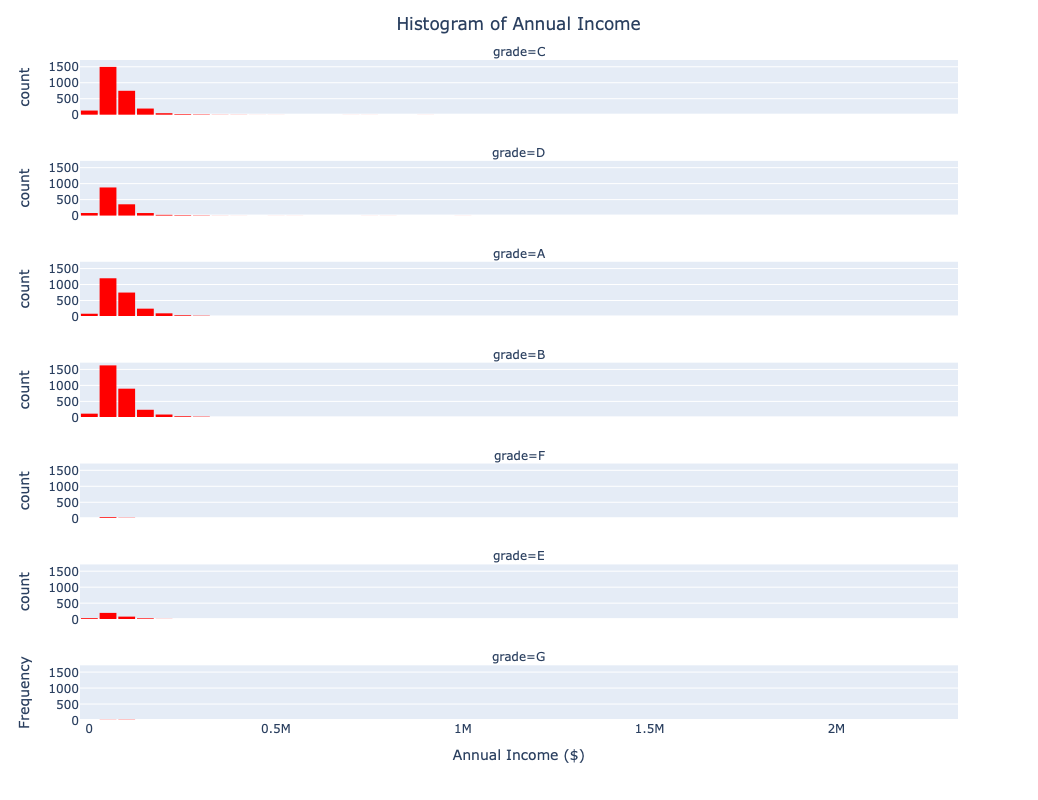

In [21]:
fig = px.histogram(DF,
                  x='annual_income',
                  nbins=64,
                  facet_col='grade',
                  facet_col_wrap=1,
                  color_discrete_sequence=['red'])

fig.update_layout(bargap=0.1,
                  title='Histogram of Annual Income',
                  title_x=0.5,
                  xaxis_title="Annual Income ($)",
                  yaxis_title="Frequency",
                  autosize=False,
                  width=800,
                  height=800)

fig.show()

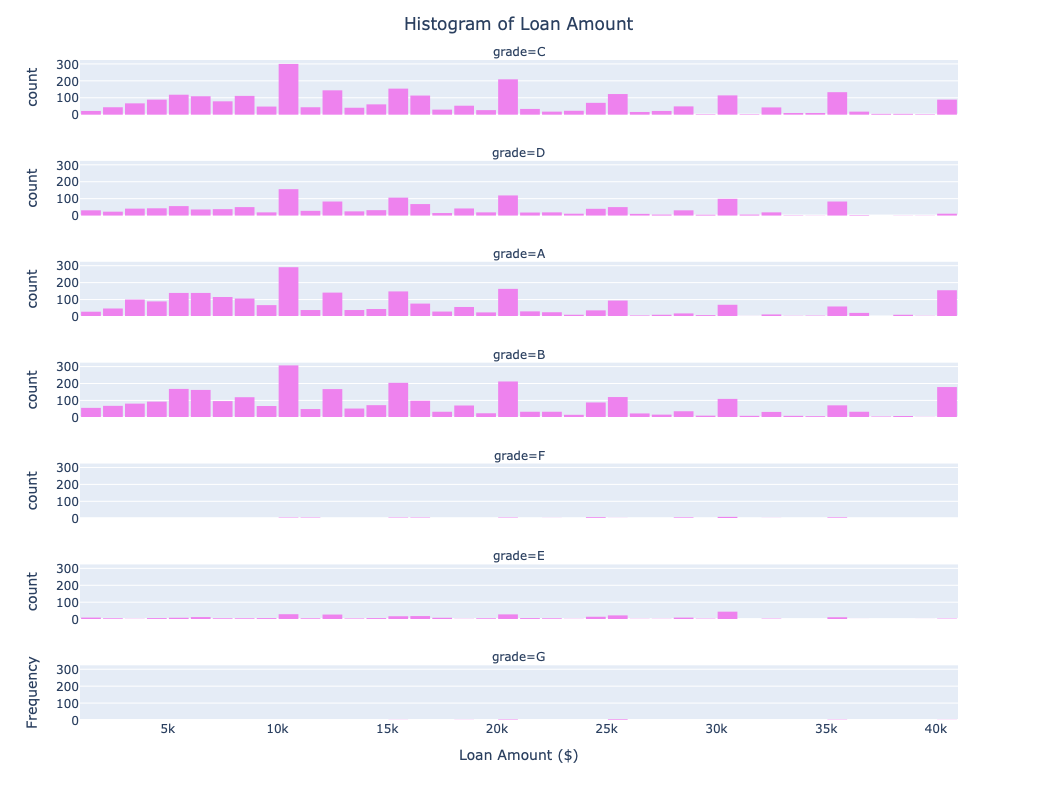

In [23]:
fig = px.histogram(DF,
                  x='loan_amount',
                  nbins=64,
                  facet_col='grade',
                  facet_col_wrap=1,
                  color_discrete_sequence=['violet'])

fig.update_layout(bargap=0.1,
                  title='Histogram of Loan Amount',
                  title_x=0.5,
                  xaxis_title="Loan Amount ($)",
                  yaxis_title="Frequency",
                  autosize=False,
                  width=800,
                  height=800)

fig.show()